# Airline Crashs EDA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,timedelta,datetime


In [2]:
data=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')

In [3]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [5]:
TotalRowCount_Before = len(data)
print("Total Number of Data Count :", TotalRowCount_Before)

Total Number of Data Count : 4967


In [6]:
#checking missing values
data.isnull().sum().sort_values(ascending=False)


Flight #                 3652
Time                     1510
Route                     774
cn/ln                     668
Registration              273
Fatalities Passangers     242
Fatalities Crew           241
Aboard Passangers         229
Aboard Crew               226
Summary                    64
Ground                     41
Aboard                     18
AC Type                    15
Operator                   10
Fatalities                  8
Location                    4
Date                        0
dtype: int64

In [7]:
data['Time']=data['Time'].replace(np.nan,'00:00')
data['Time']=data['Time'].str.replace('c: ','')
data['Time']=data['Time'].str.replace('c:','')
data['Time']=data['Time'].str.replace('c','')
data['Time']=data['Time'].str.replace('12\'20','12:20')
data['Time']=data['Time'].str.replace('18.40', '18:40')
data['Time']=data['Time'].str.replace('0943', '09:43')
data['Time']=data['Time'].str.replace('22\'08', '22:08')
data['Time']=data['Time'].str.replace('114:20', '00:00')
data['Time']=data['Time'].str.replace('91:5', '00:00')
data['Time']=data['Time'].str.replace('90:0', '00:00')
data['Time']=data['Time'].str.replace('24:5', '00:05')

data['Time']=data['Date']+' '+data['Time']

C:\Users\anant\AppData\Local\Temp/ipykernel_10212/2821707147.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Time']=data['Time'].str.replace('18.40', '18:40')


In [8]:
data['Time']

0       09/17/1908 17:18
1       09/07/1909 00:00
2       07/12/1912 06:30
3       08/06/1913 00:00
4       09/09/1913 18:30
              ...       
4962    04/16/2019 11:00
4963    05/05/2019 18:30
4964    05/05/2019 18:30
4965    06/03/2019 13:00
4966    07/30/2019 02:00
Name: Time, Length: 4967, dtype: object

In [9]:
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
data['Time'] = data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(data.Time.min()) + ' to ' + str(data.Time.max()))

Date ranges from 1908-09-17 17:18:00 to 2019-07-30 02:00:00


In [10]:
data['Operator']=data['Operator'].str.upper()

In [11]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4967 non-null   object        
 1   Time                   4967 non-null   datetime64[ns]
 2   Location               4963 non-null   object        
 3   Operator               4957 non-null   object        
 4   Flight #               1315 non-null   object        
 5   Route                  4193 non-null   object        
 6   AC Type                4952 non-null   object        
 7   Registration           4694 non-null   object        
 8   cn/ln                  4299 non-null   object        
 9   Aboard                 4949 non-null   float64       
 10  Aboard Passangers      4738 non-null   float64       
 11  Aboard Crew            4741 non-null   float64       
 12  Fatalities             4959 non-null   float64       
 13  Fat

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,1909-09-07 00:00:00,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,1912-07-12 06:30:00,"Atlantic City, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [12]:
#checking missing values
data.isnull().sum().sort_values(ascending=False)

Flight #                 3652
Route                     774
cn/ln                     668
Registration              273
Fatalities Passangers     242
Fatalities Crew           241
Aboard Passangers         229
Aboard Crew               226
Summary                    64
Ground                     41
Aboard                     18
AC Type                    15
Operator                   10
Fatalities                  8
Location                    4
Time                        0
Date                        0
dtype: int64

In [13]:
temp= data.groupby(data.Time.dt.year)[['Date']].count()
temp=temp.rename(columns={'Date':'Count'})
temp

,Count
Time,
1908,1
1909,1
1912,1
1913,3
1915,2
...,...
2015,18
2016,23
2017,15


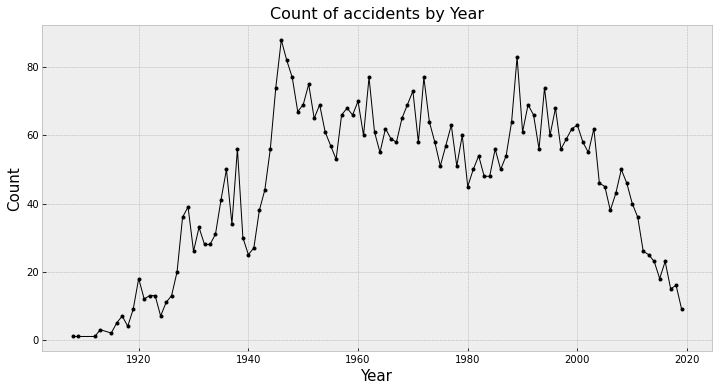

In [14]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(temp.index, 'Count', data=temp, color='black', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of accidents by Year', loc='Center', fontsize=16)
plt.show()

In [15]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of accidents by Hour')

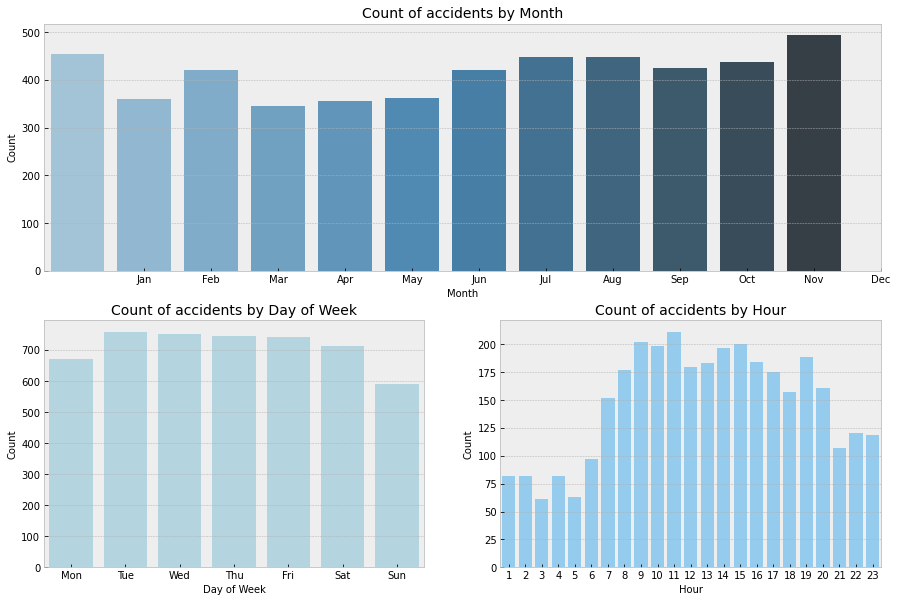

In [16]:
gs =gridspec.GridSpec(2,2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax=pl.subplot(gs[0,:])
sns.barplot(data.groupby(data.Time.dt.month)[['Date']].count().index, 'Date', data=data.groupby(data.Time.dt.month)[['Date']].count(), palette="Blues_d", linewidth=2)
plt.xticks(data.groupby(data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(data.groupby(data.Time.dt.weekday)[['Date']].count().index, 'Date', data=data.groupby(data.Time.dt.weekday)[['Date']].count(), color='lightblue', linewidth=2)
plt.xticks(data.groupby(data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count().index, 'Date', data=data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)


In [17]:
temp = data.copy()
temp['IsMilitary'] = temp.Operator.str.contains('MILITARY')
temp = temp.groupby('IsMilitary')[['IsMilitary']].count()
temp.index = ['Non-Military', 'Military']
temp

,IsMilitary
Non-Military,4207
Military,750


In [18]:
temp2 = data.copy()
temp2['Military'] = temp2.Operator.str.contains('MILITARY')
temp2['Non-Military'] = temp2.Military == False
temp2 = temp2.loc[:, ['Time', 'Military', 'Non-Military']]
temp2 = temp2.groupby(temp2.Time.dt.year)[['Military', 'Non-Military']].aggregate(np.count_nonzero)
temp2.tail(15)

,Military,Non-Military
Time,,
2005,8,37
2006,12,26
2007,5,38
2008,7,43
2009,7,39
2010,7,33
2011,4,32
2012,7,19
2013,2,23


Text(0.5, 1.0, 'Count of accidents by Year')

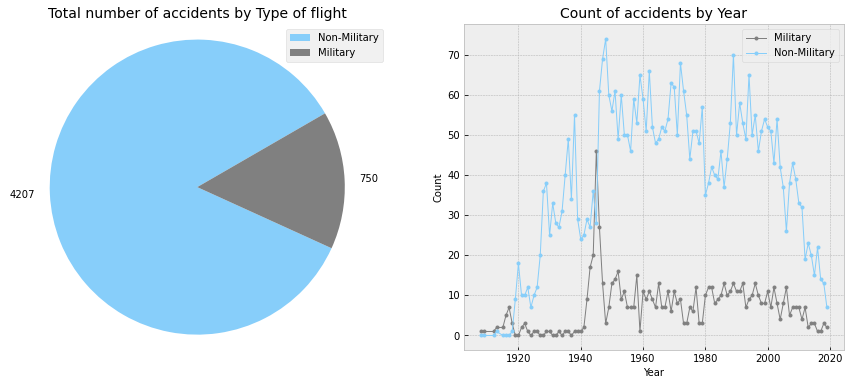

In [19]:
colors = ['lightskyblue', 'grey']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(temp.IsMilitary, colors=colors, labels=temp.IsMilitary, startangle=30)
plt.legend(patches, temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(temp2.index, 'Military', data=temp2, color='grey', marker = ".", linewidth=1)
plt.plot(temp2.index, 'Non-Military', data=temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)


In [20]:
Fatalities = data.groupby(data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']
Fatalities.isnull().sum().sort_values(ascending=False)

Aboard                   0
Aboard Passangers        0
Aboard Crew              0
Fatalities               0
Fatalities Passangers    0
Fatalities Crew          0
Ground                   0
Proportion               0
dtype: int64

Text(0.5, 1.0, 'Total number of people involved by Year')

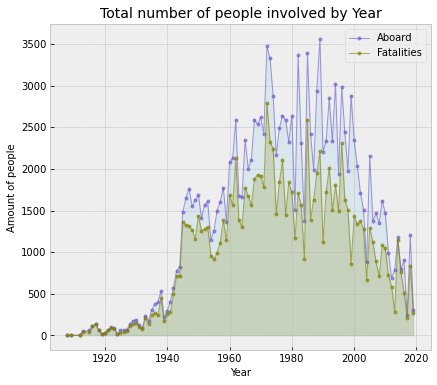

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

In [22]:
data.Operator = data.Operator.str.upper()
Total_by_Op = data.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={"Operator": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(10)
Total_by_Op

,Count
Operator,
AEROFLOT,255
MILITARY - U.S. AIR FORCE,140
AIR FRANCE,72
DEUTSCHE LUFTHANSA,63
UNITED AIR LINES,44
MILITARY - U.S. ARMY AIR FORCES,43
CHINA NATIONAL AVIATION CORPORATION,43
PAN AMERICAN WORLD AIRWAYS,41
AMERICAN AIRLINES,37


In [23]:
temp3 = data.copy()

temp3['Operator']=temp3['Operator'].replace(np.nan,'Unknown')
#temp3 = temp3.Operator.str.contains('Air France')
temp3=temp3.loc[temp3['Operator'].str.contains("Air France", case=False)]
temp3=temp3.groupby(data.Time.dt.year)[['Date']].count()
temp3=temp3.rename(columns={'Date':'Count'})

temp4=data.copy()
temp4['Operator']=temp4['Operator'].replace(np.nan,'Unknown')
temp4=temp4.loc[temp4['Operator'].str.contains("Air India", case=False)]
temp4=temp4.groupby(data.Time.dt.year)[['Date']].count()
temp4=temp4.rename(columns={'Date':'Count'})
temp4

,Count
Time,
1947,1
1950,2
1951,1
1953,1
1955,1
1966,1
1977,1
1978,1
1982,1


Text(0.5, 1.0, 'Total number of Accidents involved by Year for Air France and Air India')

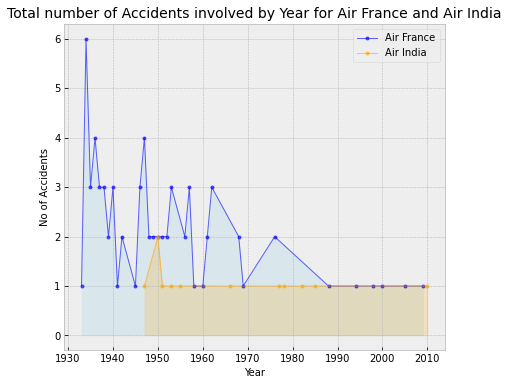

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(temp3.index, 'Count', data=temp3, color="skyblue", alpha=0.2)
plt.plot(temp3.index, 'Count', data=temp3, marker = ".", color="blue", alpha=0.6, linewidth=1,label= 'Air France')
plt.fill_between(temp4.index, 'Count', data=temp4, color="orange", alpha=0.2)
plt.plot(temp4.index, 'Count', data=temp4, color="orange", marker = ".", alpha=0.6, linewidth=1,label= 'Air India')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('No of Accidents', fontsize=10)
plt.title('Total number of Accidents involved by Year for Air France and Air India', loc='Center', fontsize=14)

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Proportion
Time,,,,,,,,
1908,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500000
1909,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.000000
1912,5.0,0.0,5.0,5.0,0.0,5.0,0.0,1.000000
1913,51.0,0.0,1.0,45.0,0.0,1.0,0.0,0.882353
1915,60.0,0.0,0.0,40.0,0.0,0.0,0.0,0.666667
...,...,...,...,...,...,...,...,...
2015,796.0,717.0,79.0,759.0,683.0,76.0,21.0,0.953518
2016,903.0,801.0,102.0,515.0,435.0,80.0,1.0,0.570321
2017,241.0,192.0,49.0,210.0,171.0,39.0,35.0,0.871369


Text(0.5, 1.0, 'Count of Fatalities Passangers by Year')

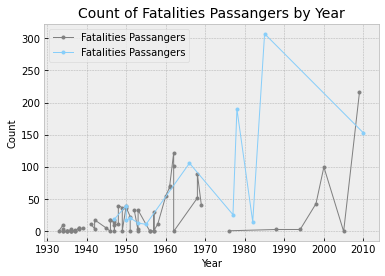

In [41]:
temp5 = data.copy()

temp5['Operator']=temp5['Operator'].replace(np.nan,'Unknown')
#temp3 = temp3.Operator.str.contains('Air France')
temp5=temp5.loc[temp5['Operator'].str.contains("Air France", case=False)]

temp6 = data.copy()
temp6['Operator']=temp6['Operator'].replace(np.nan,'Unknown')
#temp3 = temp3.Operator.str.contains('Air France')
temp6=temp6.loc[temp6['Operator'].str.contains("Air India", case=False)]

plt.plot(temp5.Time.dt.year, 'Fatalities Passangers', data=temp5, color='grey', marker = ".", linewidth=1)
plt.plot(temp6.Time.dt.year, 'Fatalities Passangers', data=temp6, color='lightskyblue', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of Fatalities Passangers by Year', loc='Center', fontsize=14)




In [38]:
temp5

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
321,10/31/1933,1933-10-31 11:20:00,"Etobon, France",AIR FRANCE,NaN,Zurich - Basel - Paris,Farman F-301,F-AJMI,04,5.0,2.0,3.0,2.0,1.0,1.0,0.0,NaN
330,01/15/1934,1934-01-15 18:15:00,"Corbigny, France",AIR FRANCE,NaN,Saigon - Paris,Dewoitine D-332,F-AMMY,01,14.0,10.0,4.0,14.0,10.0,4.0,0.0,The aircraft crashed while en route in a sever...
331,01/20/1934,1934-01-20 00:00:00,"Carombe, France",AIR FRANCE,NaN,NaN,Breguet 280T,F-AJKX,NaN,2.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN
333,02/26/1934,1934-02-26 00:00:00,"Rio de Oro, Morocco",AIR FRANCE,NaN,NaN,Latécoère 28,F-AJPA,925,6.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN
338,05/09/1934,1934-05-09 00:00:00,English Channel,AIR FRANCE,NaN,"Dieppe, France - New Haven, England",Wibault 282T-12,F-AMPH,8,6.0,3.0,3.0,6.0,3.0,3.0,0.0,Crashed into the English Channel and sunk imme...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,12/26/1994,1994-12-26 17:00:00,"Algiers Airport, Algeria",AIR FRANCE,8969,Alger - Paris,Airbus A300B2-1C,F-GBEC,104,239.0,227.0,12.0,3.0,3.0,0.0,0.0,The aircraft was hijacked by terrorists. Three...
4124,04/20/1998,1998-04-20 16:47:00,"Near Bogota, Colombia",AIR FRANCE,422,Bogota - Quito,Boeing B-727-230,HC-BSU,21622/1431,53.0,43.0,10.0,53.0,43.0,10.0,0.0,"The aircraft, leased from TAME, crashed atop f..."
4269,07/25/2000,2000-07-25 16:44:00,"Gonesse, France",AIR FRANCE,4590,Paris - New York City,Aerospatiale BAe Concorde 101,F-BTSC,203,109.0,100.0,9.0,109.0,100.0,9.0,4.0,The aircraft struggled to gain altitude after ...
4543,08/02/2005,2005-08-02 16:04:00,"Toronto, Canada",AIR FRANCE,358,"Paris, France - Toronto Canada",Airbus A-340,F-GLZQ,289,309.0,297.0,12.0,0.0,0.0,0.0,0.0,The plane landed almost half-way down Runway 2...


In [36]:
Fatalities

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000237E504B490>>

In [81]:

temp5['Survived']=temp5['Aboard Passangers']-temp5['Fatalities Passangers']
temp6['Survived']=temp6['Aboard Passangers']-temp6['Fatalities Passangers']
temp6['Fatalities Passangers'].sum()

918.0

In [82]:
temp5['Fatalities Passangers'].sum()

1430.0

In [83]:
temp5['Aboard Passangers'].sum()

2259.0

In [84]:
temp5['Survaival Rate'].sum()

822.0

In [88]:
print('Total Passengers Aboard in Air France :',temp5['Aboard Passangers'].sum()
     ,'\nTotal Passengers Aboard in Air India :',temp6['Aboard Passangers'].sum()
    ,'\nTotal Fatalities in Air France :',temp5['Fatalities Passangers'].sum()
    ,'\nTotal Fatalities in Air India :',temp6['Fatalities Passangers'].sum()
     ,'\nTotal Passengers survived in Air France Crash :',temp5['Survived'].sum()
     ,'\nTotal Passengers survived in Air India Crash :',temp6['Survived'].sum())

Total Passengers Aboard in Air France : 2259.0 
Total Passengers Aboard in Air India : 1012.0 
Total Fatalities in Air France : 1430.0 
Total Fatalities in Air India : 918.0 
Total Passengers survived in Air France Crash : 822.0 
Total Passengers survived in Air India Crash : 94.0


In [98]:
temp5.tail(4)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Survaival Rate,Survived
4124,04/20/1998,1998-04-20 16:47:00,"Near Bogota, Colombia",AIR FRANCE,422,Bogota - Quito,Boeing B-727-230,HC-BSU,21622/1431,53.0,43.0,10.0,53.0,43.0,10.0,0.0,"The aircraft, leased from TAME, crashed atop f...",0.0,0.0
4269,07/25/2000,2000-07-25 16:44:00,"Gonesse, France",AIR FRANCE,4590,Paris - New York City,Aerospatiale BAe Concorde 101,F-BTSC,203,109.0,100.0,9.0,109.0,100.0,9.0,4.0,The aircraft struggled to gain altitude after ...,0.0,0.0
4543,08/02/2005,2005-08-02 16:04:00,"Toronto, Canada",AIR FRANCE,358,"Paris, France - Toronto Canada",Airbus A-340,F-GLZQ,289,309.0,297.0,12.0,0.0,0.0,0.0,0.0,The plane landed almost half-way down Runway 2...,297.0,297.0
4710,06/01/2009,2009-06-01 00:15:00,"Atlantic Ocean, 570 miles northeast of Natal, ...",AIR FRANCE,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,216.0,12.0,228.0,216.0,12.0,0.0,The Airbus went missing over the Atlantic Ocea...,0.0,0.0


In [99]:
temp6.tail(4)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Survaival Rate,Survived
2936,01/01/1978,1978-01-01 20:41:00,"Off Bandra, Maharashtra, India",AIR INDIA,855,Bombay - Dubai,Boeing B-747-237B,VT-EBD,19959/124,213.0,190.0,23.0,213.0,190.0,23.0,0.0,"Following a right turn, after taking off, the ...",0.0,0.0
3171,06/22/1982,1982-06-22 04:34:00,"Bombay, India",AIR INDIA,NaN,Kuala Lumpur - Mumbai,Boeing B-707-437,VT-DJJ,17723/100,111.0,99.0,12.0,17.0,15.0,2.0,0.0,The crew initiated a go-around after a heavy l...,84.0,84.0
3320,06/23/1985,1985-06-23 07:15:00,"Atlantic Ocean, 110 miles West of Ireland",AIR INDIA,182,Montreal - London,Boeing B-747-237B,VT-EFO,21473/330,329.0,307.0,22.0,329.0,307.0,22.0,0.0,The aircraft broke up in flight and crashed in...,0.0,0.0
4748,05/22/2010,2010-05-22 06:10:00,"Mangalore, India",AIR INDIA EXPRESS,812,"Dubai, UAE - Mangalore, India",Boeing 737-8HG,VT-AXV,36333/2481,166.0,160.0,6.0,159.0,153.0,6.0,0.0,"While attempting to land at Mangalore Airport,...",7.0,7.0
